In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def plotSensor(array: iter, title: str, x_label: str, y_label: str):
    x = [-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50]
    plt.figure(figsize=(10,4))
    for i in range(0, 8):
        plt.plot(x, array[:,i], marker='o', label=f'S{i}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

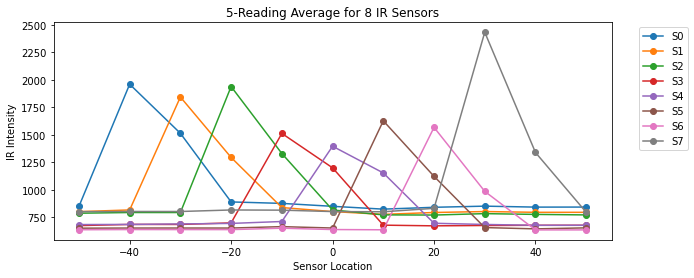

In [124]:
file_dir = '../Documentation/Calibration/sensorcalibrate_042822_1820.txt'

# (5*11) x 9 array generated
data_raw = np.genfromtxt(file_dir, delimiter=',')
# Remove empty 9th row, now (5*11) x 8 array
data_raw = np.delete(data_raw, 8, 1)

# Calculate means of every 5 rows
# 11 x 8 array of means
data_mean = np.empty((11, 8))
for i in range(11):
    data_mean[i] = np.mean(data[5*i:5*i+5], 0)
#print(data_mean)

# Plot
plotSensor(data_mean, '5-Reading Average for 8 IR Sensors', 'Sensor Location', 'IR Intensity')

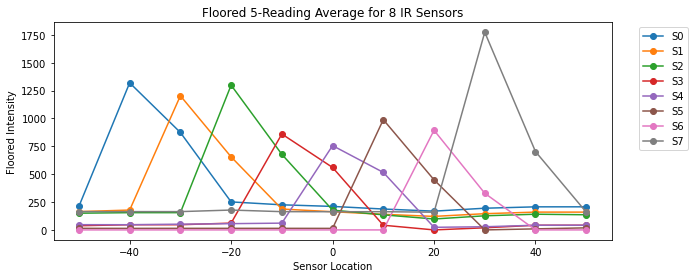

In [125]:
# Normalization

# Flooring
data_min = np.amin(data_mean, 1)
#print(data_min)
data_floor = data_mean.copy()
for idx, subtrahend in enumerate(data_min):
    data_floor[idx] -= subtrahend
plotSensor(data_floor, 'Floored 5-Reading Average for 8 IR Sensors', 'Sensor Location', 'Floored Intensity')

[ 212.  1319.4 1203.4 1298.6  860.4  756.2  989.2  894.  1773.2  702.8
  207.2]


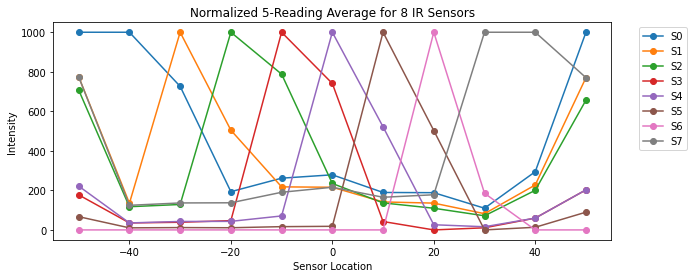

In [126]:
# Max scaling
data_max = np.max(data_floor, 1)
print(data_max)
data_norm = data_floor.copy()
for idx, subtrahend in enumerate(data_max):
    data_norm[idx] /= data_max[idx]
    data_norm[idx] *= 1000
plotSensor(data_norm, 'Normalized 5-Reading Average for 8 IR Sensors', 'Sensor Location', 'Intensity')

In [150]:
# Applying Weights

# Distance errors (mm)
errors = [-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50]

# Weights
weights = [-8, -4, -2, -1, 1, 2, 4, 8]
weights = [num / 4. for num in weights]

print(data_norm[0])
print(np.sum(np.multiply(data_norm[0], weights)))

for row in data_norm:
    print(np.sum(np.multiply(row, weights)))
print(data_norm[
print(data_norm[10])

[1000.          774.52830189  707.54716981  177.35849057  221.69811321
   66.98113208    0.          774.52830189]
-1534.6698113207542
-1534.6698113207542
-1939.5937547370015
-2237.0782782117335
-1112.4287694440166
-978.6145978614596
-385.21555144141735
361.40315406389004
1046.4765100671138
1849.45296638845
1090.0682982356288
-1513.030888030888
[1000.          770.27027027  656.37065637  202.7027027   202.7027027
   89.76833977    0.          770.27027027]
